<a href="https://colab.research.google.com/github/PesicLazar/Mining-of-Massive-Datasets-final/blob/main/2017230143_lazar_pesic_data_mining.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install pyspark

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 310.8/310.8 MB 4.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pyspark: filename=pyspark-3.4.0-py2.py3-none-any.whl size=311317130 sha256=69a55212c47e37305973920856b2384e6135689a730f493ff30fdf5094ba4640
  Stored in directory: /root/.cache/pip/wheels/7b/1b/4b/3363a1d04368e7ff0d408e57ff57966fcdf00583774e761327
Successfully built pyspark


In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
from pyspark.sql import SparkSession

# Create a SparkSession
spark = SparkSession.builder.appName("DataScienceSalaries").getOrCreate()

In [ ]:
df = spark.read.csv('gdrive/My Drive/data/ds_salaries.csv', inferSchema=True, header=True)

In [ ]:
# EDA - Exploratory Data Analysis
df.count()

3755

In [ ]:
df.columns

['work_year',
 'experience_level',
 'employment_type',
 'job_title',
 'salary',
 'salary_currency',
 'salary_in_usd',
 'employee_residence',
 'remote_ratio',
 'company_location',
 'company_size']

In [ ]:
df.show()

+---------+----------------+---------------+--------------------+------+---------------+-------------+------------------+------------+----------------+------------+
|work_year|experience_level|employment_type|           job_title|salary|salary_currency|salary_in_usd|employee_residence|remote_ratio|company_location|company_size|
+---------+----------------+---------------+--------------------+------+---------------+-------------+------------------+------------+----------------+------------+
|     2023|              SE|             FT|Principal Data Sc...| 80000|            EUR|        85847|                ES|         100|              ES|           L|
|     2023|              MI|             CT|         ML Engineer| 30000|            USD|        30000|                US|         100|              US|           S|
|     2023|              MI|             CT|         ML Engineer| 25500|            USD|        25500|                US|         100|              US|           S|
|     2023

In [ ]:
#chek what is string what is int
df.printSchema()

root
 |-- work_year: integer (nullable = true)
 |-- experience_level: string (nullable = true)
 |-- employment_type: string (nullable = true)
 |-- job_title: string (nullable = true)
 |-- salary: integer (nullable = true)
 |-- salary_currency: string (nullable = true)
 |-- salary_in_usd: integer (nullable = true)
 |-- employee_residence: string (nullable = true)
 |-- remote_ratio: integer (nullable = true)
 |-- company_location: string (nullable = true)
 |-- company_size: string (nullable = true)



In [ ]:
df.describe().show()

+-------+------------------+----------------+---------------+--------------------+------------------+---------------+------------------+------------------+------------------+----------------+------------+
|summary|         work_year|experience_level|employment_type|           job_title|            salary|salary_currency|     salary_in_usd|employee_residence|      remote_ratio|company_location|company_size|
+-------+------------------+----------------+---------------+--------------------+------------------+---------------+------------------+------------------+------------------+----------------+------------+
|  count|              3755|            3755|           3755|                3755|              3755|           3755|              3755|              3755|              3755|            3755|        3755|
|   mean|2022.3736351531293|            null|           null|                null|190695.57177097205|           null|137570.38988015978|              null|46.271637816245004|      

In [ ]:
df.groupBy('experience_level').count().show()

+----------------+-----+
|experience_level|count|
+----------------+-----+
|              EX|  114|
|              MI|  805|
|              EN|  320|
|              SE| 2516|
+----------------+-----+



In [ ]:
#after cheaking diffrent columns i desided to stick with 'company_size', 'experience_level' and see how they effect 'remote_ratio', if there is any Correlation betwen them.
df.groupBy('company_size').count().show()

+------------+-----+
|company_size|count|
+------------+-----+
|           L|  454|
|           M| 3153|
|           S|  148|
+------------+-----+



In [ ]:
df.groupBy('job_title').count().show()

+--------------------+-----+
|           job_title|count|
+--------------------+-----+
|3D Computer Visio...|    4|
|  Lead Data Engineer|    6|
|        Data Modeler|    2|
| Data Scientist Lead|    2|
|Principal Data Ar...|    1|
|Head of Machine L...|    1|
|Machine Learning ...|   10|
|Data Analytics Sp...|    2|
|     Data Specialist|   14|
|Data Operations E...|   10|
|Deep Learning Res...|    1|
| Data Analytics Lead|    2|
|  Power BI Developer|    1|
|Machine Learning ...|   26|
|   Lead Data Analyst|    5|
|        BI Developer|   13|
|Staff Data Scientist|    1|
|       ETL Developer|   10|
|           Data Lead|    2|
|Product Data Scie...|    1|
+--------------------+-----+
only showing top 20 rows



In [ ]:
#what job dos most people have in our data set (not importent for what im doing :p)
grouped_job_df = df.groupBy('job_title').count()
from pyspark.sql.functions import desc
sorted_job_df = grouped_job_df.orderBy(desc('count'))
sorted_job_df.show()

+--------------------+-----+
|           job_title|count|
+--------------------+-----+
|       Data Engineer| 1040|
|      Data Scientist|  840|
|        Data Analyst|  612|
|Machine Learning ...|  289|
|  Analytics Engineer|  103|
|      Data Architect|  101|
|  Research Scientist|   82|
|   Applied Scientist|   58|
|Data Science Manager|   58|
|   Research Engineer|   37|
|         ML Engineer|   34|
|        Data Manager|   29|
|Machine Learning ...|   26|
|Data Science Cons...|   24|
|Data Analytics Ma...|   22|
|Computer Vision E...|   18|
|        AI Scientist|   16|
|Business Data Ana...|   15|
|     BI Data Analyst|   15|
|     Data Specialist|   14|
+--------------------+-----+
only showing top 20 rows



In [ ]:
#Filter out rows with missing values (no missing values)
df_filtered = df.na.drop()
df_filtered.count()

3755

In [ ]:
df.groupBy('remote_ratio').count().show()

+------------+-----+
|remote_ratio|count|
+------------+-----+
|         100| 1643|
|          50|  189|
|           0| 1923|
+------------+-----+



In [ ]:
df.groupBy('remote_ratio').mean().show()

+------------+------------------+------------------+------------------+-----------------+
|remote_ratio|    avg(work_year)|       avg(salary)|avg(salary_in_usd)|avg(remote_ratio)|
+------------+------------------+------------------+------------------+-----------------+
|         100|2022.2404138770542|191047.21059038345|136481.45283018867|            100.0|
|          50|2021.5343915343915| 557067.5026455027| 78400.68783068784|             50.0|
|           0| 2022.569942797712|154386.65990639626|144316.20228809153|              0.0|
+------------+------------------+------------------+------------------+-----------------+



In [ ]:
#toke out data were 50% of wrok is done remotely
filtered_df = df.filter(df.remote_ratio != 50)
filtered_df.show()

+---------+----------------+---------------+--------------------+------+---------------+-------------+------------------+------------+----------------+------------+
|work_year|experience_level|employment_type|           job_title|salary|salary_currency|salary_in_usd|employee_residence|remote_ratio|company_location|company_size|
+---------+----------------+---------------+--------------------+------+---------------+-------------+------------------+------------+----------------+------------+
|     2023|              SE|             FT|Principal Data Sc...| 80000|            EUR|        85847|                ES|         100|              ES|           L|
|     2023|              MI|             CT|         ML Engineer| 30000|            USD|        30000|                US|         100|              US|           S|
|     2023|              MI|             CT|         ML Engineer| 25500|            USD|        25500|                US|         100|              US|           S|
|     2023

In [ ]:
df = filtered_df

In [ ]:
df.groupBy('remote_ratio').count().show()

+------------+-----+
|remote_ratio|count|
+------------+-----+
|         100| 1643|
|           0| 1923|
+------------+-----+



In [ ]:
df.groupBy('remote_ratio').mean().show()

+------------+------------------+------------------+------------------+-----------------+
|remote_ratio|    avg(work_year)|       avg(salary)|avg(salary_in_usd)|avg(remote_ratio)|
+------------+------------------+------------------+------------------+-----------------+
|         100|2022.2404138770542|191047.21059038345|136481.45283018867|            100.0|
|           0| 2022.569942797712|154386.65990639626|144316.20228809153|              0.0|
+------------+------------------+------------------+------------------+-----------------+



In [ ]:
from pyspark.sql.functions import when

# Map values 100 and 0 to 1 and 0, respectively, in the "remote_ratio" column
df = df.withColumn("remote_ratio", when(df["remote_ratio"] == 100, 1)
                                  .when(df["remote_ratio"] == 0, 0)
                                  .otherwise(df["remote_ratio"]))

df.show()

+---------+----------------+---------------+--------------------+------+---------------+-------------+------------------+------------+----------------+------------+
|work_year|experience_level|employment_type|           job_title|salary|salary_currency|salary_in_usd|employee_residence|remote_ratio|company_location|company_size|
+---------+----------------+---------------+--------------------+------+---------------+-------------+------------------+------------+----------------+------------+
|     2023|              SE|             FT|Principal Data Sc...| 80000|            EUR|        85847|                ES|           1|              ES|           L|
|     2023|              MI|             CT|         ML Engineer| 30000|            USD|        30000|                US|           1|              US|           S|
|     2023|              MI|             CT|         ML Engineer| 25500|            USD|        25500|                US|           1|              US|           S|
|     2023

In [ ]:
from pyspark.ml.feature import StringIndexer

In [ ]:
# converting one feature -> inputCol 'str', outputCol 'str,
company_size_indexer = StringIndexer(inputCol='company_size', outputCol='company_size_Num').fit(df)

In [ ]:
df = company_size_indexer.transform(df)

In [ ]:
df.show(5, truncate=False)

+---------+----------------+---------------+------------------------+------+---------------+-------------+------------------+------------+----------------+------------+----------------+
|work_year|experience_level|employment_type|job_title               |salary|salary_currency|salary_in_usd|employee_residence|remote_ratio|company_location|company_size|company_size_Num|
+---------+----------------+---------------+------------------------+------+---------------+-------------+------------------+------------+----------------+------------+----------------+
|2023     |SE              |FT             |Principal Data Scientist|80000 |EUR            |85847        |ES                |1           |ES              |L           |1.0             |
|2023     |MI              |CT             |ML Engineer             |30000 |USD            |30000        |US                |1           |US              |S           |2.0             |
|2023     |MI              |CT             |ML Engineer             |2

In [ ]:
df.groupBy('company_size').count().orderBy('count', ascending=False).show()

+------------+-----+
|company_size|count|
+------------+-----+
|           M| 3106|
|           L|  344|
|           S|  116|
+------------+-----+



In [ ]:
df.groupBy('company_size_Num').count().orderBy('count', ascending=False).show()

+----------------+-----+
|company_size_Num|count|
+----------------+-----+
|             0.0| 3106|
|             1.0|  344|
|             2.0|  116|
+----------------+-----+



In [ ]:
#same for exp lvl
experience_level_indexer = StringIndexer(inputCol="experience_level", outputCol="experience_level_Num").fit(df)


In [ ]:
df = experience_level_indexer.transform(df)

In [ ]:
df.groupBy('experience_level').count().orderBy('count',ascending=False).show()

+----------------+-----+
|experience_level|count|
+----------------+-----+
|              SE| 2472|
|              MI|  731|
|              EN|  255|
|              EX|  108|
+----------------+-----+



In [ ]:
df.groupBy('experience_level_Num').count().orderBy('count',ascending=False).show()

+--------------------+-----+
|experience_level_Num|count|
+--------------------+-----+
|                 0.0| 2472|
|                 1.0|  731|
|                 2.0|  255|
|                 3.0|  108|
+--------------------+-----+



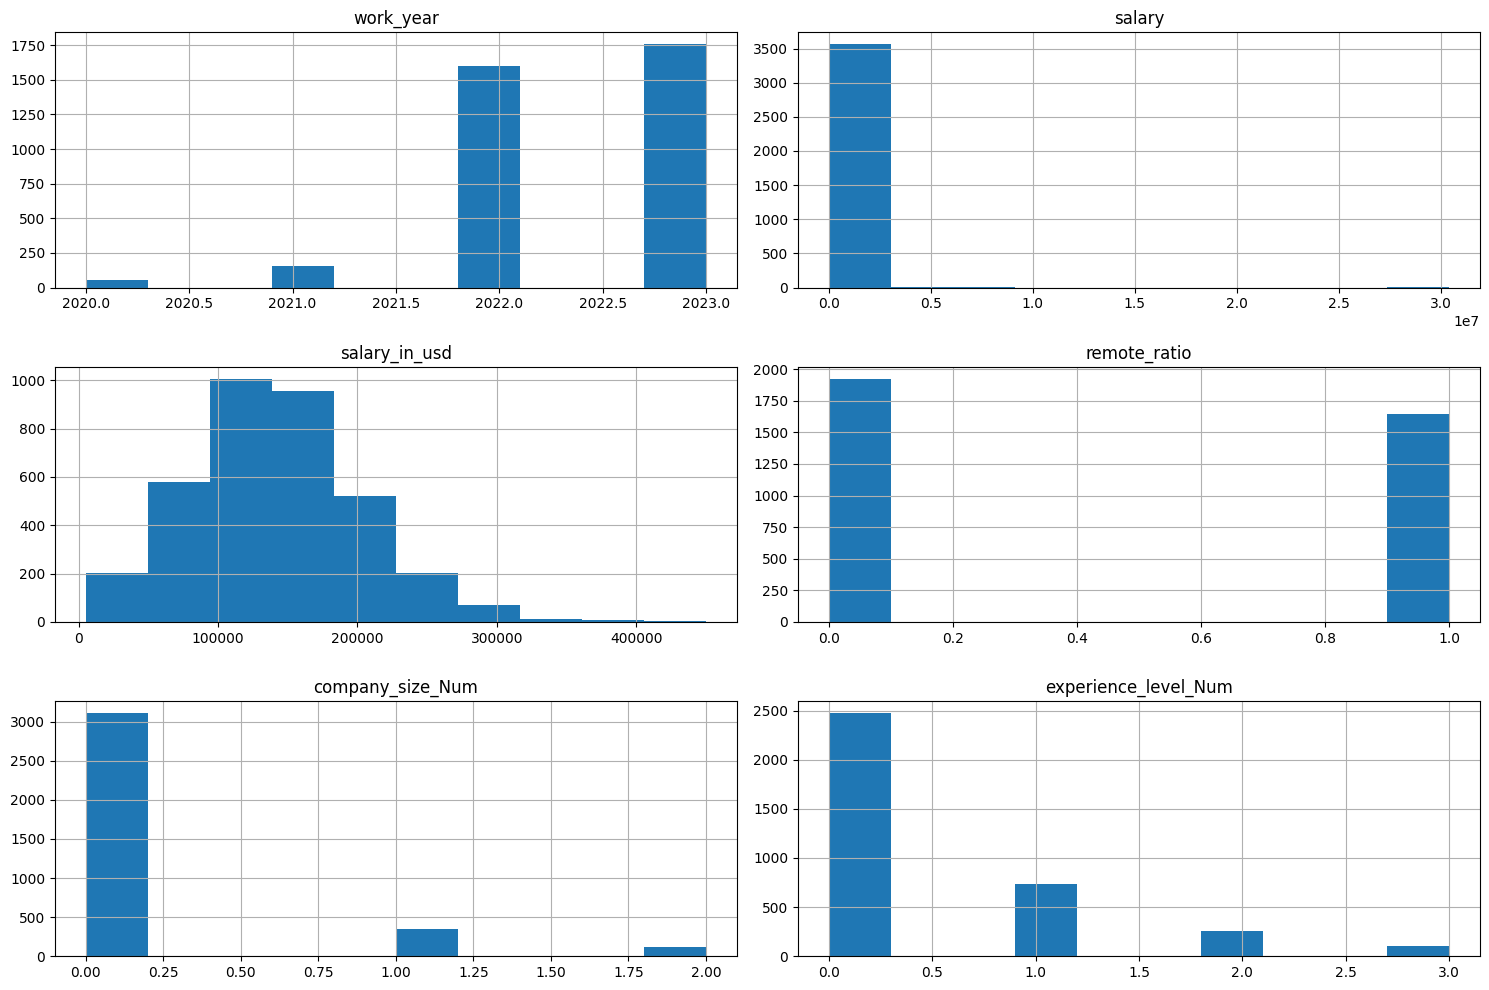

In [ ]:
import matplotlib.pyplot as plt

data = df.toPandas()
data.hist(figsize=(15,10))

plt.tight_layout()
plt.show()

In [ ]:
#creating vectors
from pyspark.ml.feature import OneHotEncoder

In [ ]:
company_size_encoder = OneHotEncoder(inputCol="company_size_Num", outputCol="company_size_Vector")

In [ ]:
model = company_size_encoder.fit(df)

In [ ]:
df = model.transform(df)

In [ ]:
df.show(4,False)

+---------+----------------+---------------+------------------------+------+---------------+-------------+------------------+------------+----------------+------------+----------------+--------------------+-------------------+
|work_year|experience_level|employment_type|job_title               |salary|salary_currency|salary_in_usd|employee_residence|remote_ratio|company_location|company_size|company_size_Num|experience_level_Num|company_size_Vector|
+---------+----------------+---------------+------------------------+------+---------------+-------------+------------------+------------+----------------+------------+----------------+--------------------+-------------------+
|2023     |SE              |FT             |Principal Data Scientist|80000 |EUR            |85847        |ES                |1           |ES              |L           |1.0             |0.0                 |(2,[1],[1.0])      |
|2023     |MI              |CT             |ML Engineer             |30000 |USD            |

In [ ]:
df.groupBy('company_size_Vector').count().orderBy('count', ascending=False).show(3,False)

+-------------------+-----+
|company_size_Vector|count|
+-------------------+-----+
|(2,[0],[1.0])      |3106 |
|(2,[1],[1.0])      |344  |
|(2,[],[])          |116  |
+-------------------+-----+



In [ ]:
#reapiting same for experience_level
experience_level_encoder = OneHotEncoder(inputCol="experience_level_Num", outputCol="experience_level_Vector")
model = experience_level_encoder.fit(df)
df = model.transform(df)
df.select(['experience_level','experience_level_Num','experience_level_Vector']).show(4,False)

+----------------+--------------------+-----------------------+
|experience_level|experience_level_Num|experience_level_Vector|
+----------------+--------------------+-----------------------+
|SE              |0.0                 |(3,[0],[1.0])          |
|MI              |1.0                 |(3,[1],[1.0])          |
|MI              |1.0                 |(3,[1],[1.0])          |
|SE              |0.0                 |(3,[0],[1.0])          |
+----------------+--------------------+-----------------------+
only showing top 4 rows



In [ ]:
df.groupBy('experience_level_Vector').count().orderBy('count', ascending=False).show(4,False)

+-----------------------+-----+
|experience_level_Vector|count|
+-----------------------+-----+
|(3,[0],[1.0])          |2472 |
|(3,[1],[1.0])          |731  |
|(3,[2],[1.0])          |255  |
|(3,[],[])              |108  |
+-----------------------+-----+



In [ ]:
# assemble all of the input columns into a single vector that would act as the input feature for the model.

In [ ]:
from pyspark.ml.feature import VectorAssembler


In [ ]:
df_assembler = VectorAssembler(inputCols=['company_size_Vector','experience_level_Vector'],\

                                outputCol="features")

In [ ]:
#cheak if we have the column features, which is nothing but a combination of all the input features represented as a single dense vector.
df = df_assembler.transform(df)

In [ ]:
df.printSchema()


root
 |-- work_year: integer (nullable = true)
 |-- experience_level: string (nullable = true)
 |-- employment_type: string (nullable = true)
 |-- job_title: string (nullable = true)
 |-- salary: integer (nullable = true)
 |-- salary_currency: string (nullable = true)
 |-- salary_in_usd: integer (nullable = true)
 |-- employee_residence: string (nullable = true)
 |-- remote_ratio: integer (nullable = true)
 |-- company_location: string (nullable = true)
 |-- company_size: string (nullable = true)
 |-- company_size_Num: double (nullable = false)
 |-- experience_level_Num: double (nullable = false)
 |-- company_size_Vector: vector (nullable = true)
 |-- experience_level_Vector: vector (nullable = true)
 |-- features: vector (nullable = true)



In [ ]:
df.select(['features','remote_ratio']).show(10,False)

+-------------------+------------+
|features           |remote_ratio|
+-------------------+------------+
|(5,[1,2],[1.0,1.0])|1           |
|(5,[3],[1.0])      |1           |
|(5,[3],[1.0])      |1           |
|(5,[0,2],[1.0,1.0])|1           |
|(5,[0,2],[1.0,1.0])|1           |
|(5,[1,2],[1.0,1.0])|0           |
|(5,[1,2],[1.0,1.0])|0           |
|(5,[0,2],[1.0,1.0])|0           |
|(5,[0,2],[1.0,1.0])|0           |
|(5,[0,2],[1.0,1.0])|0           |
+-------------------+------------+
only showing top 10 rows



In [ ]:
model_df = df.select(['features','remote_ratio'])

In [ ]:
train_df, test_df = model_df.randomSplit([0.75,0.25])

In [ ]:
print(train_df.count())

2693


In [ ]:
train_df.groupBy('remote_ratio').count().show()

+------------+-----+
|remote_ratio|count|
+------------+-----+
|           1| 1260|
|           0| 1433|
+------------+-----+



In [ ]:
print(test_df.count())

873


In [ ]:
test_df.groupBy('remote_ratio').count().show()

+------------+-----+
|remote_ratio|count|
+------------+-----+
|           1|  383|
|           0|  490|
+------------+-----+



In [ ]:
#Building and Training the Logistic Regression Model
from pyspark.ml.classification import LogisticRegression

In [ ]:
log_reg = LogisticRegression(labelCol='remote_ratio', maxIter=10)

In [ ]:
model = log_reg.fit(train_df)
predict_train = model.transform(train_df)
predict_test = model.transform(test_df)

In [ ]:
#predict the model
from pyspark.ml.evaluation import BinaryClassificationEvaluator

In [ ]:
evaluator = BinaryClassificationEvaluator(labelCol="remote_ratio")

In [ ]:
predict_test.select('remote_ratio','prediction').show(20)

+------------+----------+
|remote_ratio|prediction|
+------------+----------+
|           1|       1.0|
|           1|       1.0|
|           0|       0.0|
|           0|       0.0|
|           0|       0.0|
|           0|       0.0|
|           0|       0.0|
|           0|       0.0|
|           0|       0.0|
|           0|       0.0|
|           0|       0.0|
|           0|       0.0|
|           1|       0.0|
|           1|       0.0|
|           1|       0.0|
|           1|       0.0|
|           0|       0.0|
|           0|       0.0|
|           0|       0.0|
|           0|       0.0|
+------------+----------+
only showing top 20 rows



In [ ]:
#AUC - ROC curve is a performance measurement for the classification problems at various threshold settings.
#ROC is a probability curve and AUC represents the degree or measure of separability.
#It tells how much the model is capable of distinguishing between classes. Higher the AUC, the better the model is at predicting 0s as 0s and 1s as 1s.

In [ ]:
print("The area under ROC for train set is {}".format(evaluator.evaluate(predict_train)))
print("The area under ROC for test set is {}".format(evaluator.evaluate(predict_test)))
# The area under ROC for train set is 0.6462954338199581
# The area under ROC for test set is 0.6389298617116548

The area under ROC for train set is 0.5699091150765959
The area under ROC for test set is 0.5568684392817179


In [ ]:
results = predict_test.select('remote_ratio', 'prediction')

In [ ]:
# Confusion Matrix (manually create the variables for true positives, true negatives, false positives, and false negatives to understand them better rather than using the direct inbuilt function.)
true_postives = results[(results.remote_ratio == 1) & (results.prediction== 1)].count()
true_negatives = results[(results.remote_ratio == 0) & (results.prediction== 0)].count()
false_positives = results[(results.remote_ratio == 0) & (results.prediction== 1)].count()
false_negatives = results[(results.remote_ratio == 1) & (results.prediction== 0)].count()

In [ ]:
# Accuracy is the sum of true positives and true negatives divided by the total number of records:
# (TP+TN)Total number of records
accuracy = float((true_postives+true_negatives) /(results.count()))
print(accuracy)

0.6036655211912944


In [ ]:
# Recall
# Sensitivity / True Positive Rate / Recall
# The Recall rate helps in evaluating the performance of the model from a positive class standpoint. It tells the percentage of actual positive cases that the model is able to predict correctly out of the total number of positive cases.
# (TP)(TP+FN)
# What proportion of the actual converted users were correctly classified by the model.
recall = float(true_postives)/(true_postives + false_negatives)
print(recall)

0.20887728459530025


In [ ]:
# Precision
# Precision is about the number of actual positive cases out of all the positive cases predicted by the model:
# (TP)(TP+FP)
# What proportion of positive identifications was actually correct?
precision = float((true_postives) / (true_postives + false_positives))
print(precision)

0.6504065040650406


In [ ]:
# F1 Score
# F1 Score considers both precision and recall. It is the harmonic mean(average) of the precision and recall. F1 Score is best if there is some sort of balance between precision and recall. The F1 Score is not so high if one measure is improved at the expense of the other.
# 2⋅Precision⋅RecallPrecision+Recall
f1 = 2*(precision * recall) / (precision + recall)
f1

0.31620553359683795

In [ ]:
#Hyperparameter Tuning
from pyspark.ml.tuning import ParamGridBuilder, CrossValidator

In [ ]:
print(log_reg.explainParams())

aggregationDepth: suggested depth for treeAggregate (>= 2). (default: 2)
elasticNetParam: the ElasticNet mixing parameter, in range [0, 1]. For alpha = 0, the penalty is an L2 penalty. For alpha = 1, it is an L1 penalty. (default: 0.0)
family: The name of family which is a description of the label distribution to be used in the model. Supported options: auto, binomial, multinomial (default: auto)
featuresCol: features column name. (default: features)
fitIntercept: whether to fit an intercept term. (default: True)
labelCol: label column name. (default: label, current: remote_ratio)
lowerBoundsOnCoefficients: The lower bounds on coefficients if fitting under bound constrained optimization. The bound matrix must be compatible with the shape (1, number of features) for binomial regression, or (number of classes, number of features) for multinomial regression. (undefined)
lowerBoundsOnIntercepts: The lower bounds on intercepts if fitting under bound constrained optimization. The bounds vect

In [ ]:
paramGrid = ParamGridBuilder()\
    .addGrid(log_reg.maxIter,[10, 100, 1000])\
    .addGrid(log_reg.fitIntercept,[False, True])\
    .addGrid(log_reg.elasticNetParam,[0.0, 0.5, 1.0]).addGrid(log_reg.regParam,[0.01, 0.5, 2.0]).build()

# If a model is trained with the elastic net parameter α set to 1, it is equivalent to a Lasso model.
# On the other hand, if α is set to 0, the trained model reduces to a ridge regression model.


# fit_intercept=False sets the y-intercept to 0.
# If fit_intercept=True, the y-intercept will be determined by the line of best fit.

In [ ]:
# Create 5-fold CrossValidator
cv = CrossValidator(estimator=log_reg, estimatorParamMaps=paramGrid, evaluator=evaluator, numFolds=5)
# Run cross validations
cvModel = cv.fit(train_df)
# this will likely take a fair amount of time because of the amount of models that we're creating and testing
predict_train=cvModel.transform(train_df)
predict_test=cvModel.transform(test_df)
print("The area under ROC for train set after CV  is {}".format(evaluator.evaluate(predict_train)))
print("The area under ROC for test set after CV  is {}".format(evaluator.evaluate(predict_test)))

The area under ROC for train set after CV  is 0.5699091150765959
The area under ROC for test set after CV  is 0.5568684392817179


In [ ]:
bestModel = cvModel.bestModel
bestModel.getElasticNetParam()

0.0

In [ ]:
bestModel.getFitIntercept()

True

In [ ]:
bestModel.getMaxIter()

10

In [ ]:
bestModel.getRegParam()

0.01

In [ ]:
#finding root sqare error
from pyspark.ml.regression import LinearRegression
from pyspark.ml.evaluation import RegressionEvaluator

In [ ]:
# Train the linear regression model
lr = LinearRegression(featuresCol="features", labelCol="remote_ratio")
lr_model = lr.fit(train_df)

In [ ]:
# Make predictions on the testing set
predictions = lr_model.transform(test_df)

In [ ]:
# Evaluate the model using appropriate metric
evaluator = RegressionEvaluator(labelCol="remote_ratio", predictionCol="prediction", metricName="rmse")
rmse = evaluator.evaluate(predictions)

In [ ]:
# Print the evaluation results
print("Root Mean Squared Error (RMSE):", rmse)

Root Mean Squared Error (RMSE): 0.4903698374222527
